In [1]:
%matplotlib inline
import numpy as np
import agents as ag
import matplotlib.pyplot as plt

In [2]:
N = 100
num_agents = 10
num_nonoverlapping = 5
types = dict(zip(range(N), np.random.uniform(size=N)>0.5))

In [3]:
def simulate_rewards(agents, trials, title):
    rewards = []
    for i in range(trials):
        for agent in agents:
            agent.reset(types)
        for agent in agents:
            for idx in agent.tasks:
                #find reference rater who did the same task
                refidx = 0
                while refidx < len(agents) and (idx not in agents[refidx].tasks or agents[refidx] == agent):
                    refidx += 1
                if len(agents) > refidx:
                    agent.task_score(idx, agents[refidx], num_nonoverlapping)
        rewards.append(agents[0].reward)
    plt.hist(rewards)
    plt.axvline(x=np.mean(rewards), ymin=0, ymax=trials, color='r', linewidth=2)
    plt.title(title)
    plt.xlabel("Reward")
    plt.ylabel("Trials")

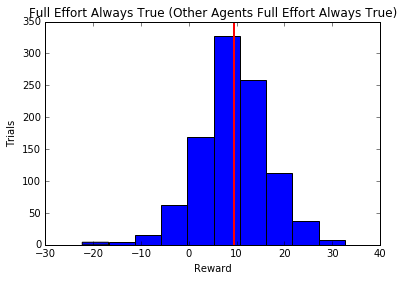

In [4]:
# all truth/full effort agents, run 1000 times and plot reward of first agent
agents = [ag.FullEffortTrueAgent(types) for i in range(num_agents)]
simulate_rewards(agents, 1000, "Full Effort Always True (Other Agents Full Effort Always True)")

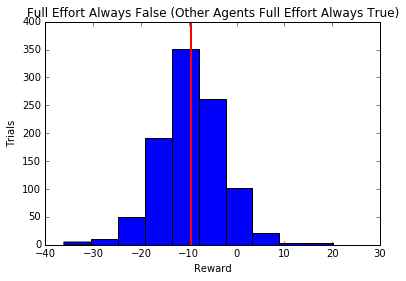

In [5]:
# 1 false/full effor agent, rest truth/full effort agents, run 1000 times and plot reward of false agent
agents = [ag.FullEffortFalseAgent(types)] + [ag.FullEffortTrueAgent(types) for i in range(num_agents-1)]
simulate_rewards(agents, 1000, "Full Effort Always False (Other Agents Full Effort Always True)")